In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Load the dataset
data = pd.read_csv("/content/Dataset.csv")

# Convert data to DataFrame
df = pd.DataFrame(data)

# Display basic dataset information
print("📌 Dataset Information:")
df.info()

# Display the first 5 rows
print("\n📌 First 5 Rows of the Dataset:")
print(df.head())

# Display the last 5 rows
print("\n📌 Last 5 Rows of the Dataset:")
print(df.tail())

# Display summary statistics for numerical columns
print("\n📌 Summary Statistics:")
print(df.describe())

# Check for missing values
print("\n📌 Missing Values per Column:")
print(df.isnull().sum())

# Display column names
print("\n📌 Column Names:")
print(df.columns.tolist())

# Display unique values for categorical columns (if applicable)
categorical_cols = df.select_dtypes(include=['object']).columns
print("\n📌 Unique Values in Categorical Columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

# Show shape of dataset (rows, columns)
print("\n📌 Dataset Shape:")
print(df.shape)  # (rows, columns)

# Show data types
print("\n📌 Data Types of Each Column:")
print(df.dtypes)


📌 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15

In [2]:
chain_threshold = 5  # Example threshold, adjust as needed

# Count the occurrences of each restaurant name
restaurant_counts = df['Restaurant Name'].value_counts()

# Identify restaurant chains based on the threshold
restaurant_chains = restaurant_counts[restaurant_counts >= chain_threshold].index.tolist()

# Display the identified restaurant chains
print("Identified Restaurant Chains:")
print(restaurant_chains)

Identified Restaurant Chains:
['Cafe Coffee Day', "Domino's Pizza", 'Subway', 'Green Chick Chop', "McDonald's", 'Keventers', 'Pizza Hut', 'Giani', 'Baskin Robbins', 'Barbeque Nation', "Giani's", 'Barista', "Dunkin' Donuts", 'Costa Coffee', 'Pind Balluchi', 'Wah Ji Wah', 'Twenty Four Seven', 'Pizza Hut Delivery', 'Sagar Ratna', 'Republic of Chicken', 'KFC', 'Starbucks', 'Chaayos', 'Burger King', "Haldiram's", 'Shree Rathnam', 'Frontier', 'Moti Mahal Delux', 'Bikanervala', 'Aggarwal Sweets', 'Behrouz Biryani', "Karim's", 'Bikaner Sweets', 'Chicago Pizza', 'Apni Rasoi', '34, Chowringhee Lane', 'Wow! Momo', 'Madras Cafe', 'Burger Point', 'Gopala', 'Shama Chicken Corner', "Berco's", "Nirula's Ice Cream", 'Sardar A Pure Meat Shop', 'Yo! China', 'Cocoberry', 'Punjabi Tadka', 'Angels in my Kitchen', 'Faasos', 'Ovenstory Pizza', 'Chowringhee', 'Punjabi Chaap Corner', 'Kebab Xpress', 'Nazeer Foods', 'RollsKing', 'Tpot', 'Mocha', 'Dolce Gelato', "Tibb's Frankie", 'The Yellow Chilli', 'Slice of It

In [3]:
chain_df = df[df['Restaurant Name'].isin(restaurant_chains)]
chain_stats = chain_df.groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum'
}).reset_index()
print("\nAnalysis of Ratings and Popularity of Restaurant Chains:")
print(chain_stats.sort_values(by='Aggregate rating', ascending=False))



Analysis of Ratings and Popularity of Restaurant Chains:
                 Restaurant Name  Aggregate rating  Votes
26                       Chili's          4.580000   8156
38                    Farzi Cafe          4.366667  10098
8                Barbeque Nation          4.353846  28142
77                  Punjab Grill          4.340000   5424
62                         Mocha          4.185714   3111
..                           ...               ...    ...
105                         Tpot          0.971429     43
34                  Dolce Gelato          0.885714     18
3                Aggarwal Sweets          0.792857     39
14   Bikaner Sweets & Restaurant          0.516667     11
53                 Kettle & Kegs          0.000000      5

[112 rows x 3 columns]


<ipython-input-5-bf0693c1374a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chain_stats.head(10).values, y=chain_stats.head(10).index, palette="viridis")


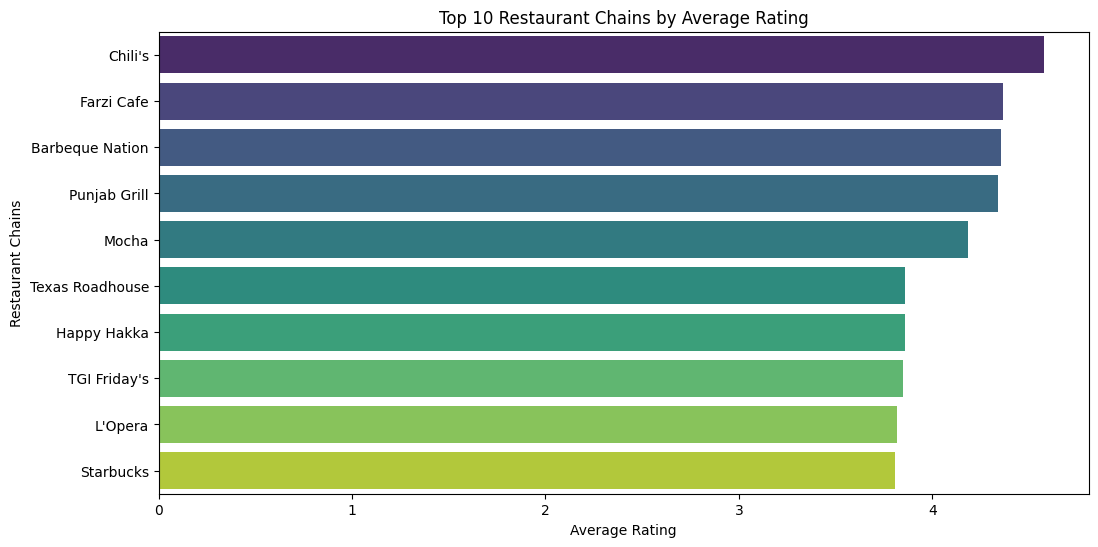

In [5]:
# Identify restaurant chains (restaurants appearing multiple times)
chain_threshold = 5  # Minimum occurrences to be considered a chain
restaurant_counts = df["Restaurant Name"].value_counts()
restaurant_chains = restaurant_counts[restaurant_counts >= chain_threshold].index.tolist()

# Filter the dataset for only these chains
chain_df = df[df["Restaurant Name"].isin(restaurant_chains)]

# Calculate the average rating for each restaurant chain
chain_stats = chain_df.groupby("Restaurant Name")["Aggregate rating"].mean().sort_values(ascending=False)

# Plot the top 10 restaurant chains by average rating
plt.figure(figsize=(12, 6))
sns.barplot(x=chain_stats.head(10).values, y=chain_stats.head(10).index, palette="viridis")
plt.xlabel("Average Rating")
plt.ylabel("Restaurant Chains")
plt.title("Top 10 Restaurant Chains by Average Rating")
plt.show()

